In [8]:
import pandas as pd
data = pd.read_csv('aliases.csv')
print("Dataset Preview:\n", data.head())
numerical_columns = data.select_dtypes(include=[float, int]).columns
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = data[((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nOutliers Detected (IQR Method):\n", outliers)


Dataset Preview:
    Id                         Alias  PersonId
0   1                111th congress         1
1   2  agna usemb kabul afghanistan         2
2   3                            ap         3
3   4                      asuncion         4
4   5                          alec         5

Outliers Detected (IQR Method):
 Empty DataFrame
Columns: [Id, Alias, PersonId]
Index: []


In [18]:
import pandas as pd
data_dict = {
    'Age': [5,25, 30, 35, 40, 45, 50, 55, 60, 65, 100],
    'Salary': [100,50000, 52000, 55000, 58000, 60000, 62000, 65000, 68000, 71000, 200000],
    'Experience': [1,1, 3, 5, 7, 10, 12, 15, 18, 20, 50]
}
data = pd.DataFrame(data_dict)
print("Dataset with Outliers:\n", data)
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print()
outliers = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("\nOutliers Detected (IQR Method):\n", outliers)

Dataset with Outliers:
     Age  Salary  Experience
0     5     100           1
1    25   50000           1
2    30   52000           3
3    35   55000           5
4    40   58000           7
5    45   60000          10
6    50   62000          12
7    55   65000          15
8    60   68000          18
9    65   71000          20
10  100  200000          50


Outliers Detected (IQR Method):
     Age  Salary  Experience
0     5     100           1
10  100  200000          50


In [25]:
import pandas as pd
import numpy as np

# Sample dataset
data = [15, 27, 28, 32, 132, 142, 182, 212, 222, 292, 302]
df = pd.DataFrame(data, columns=['values'])

# Calculate mean and standard deviation
mean = df['values'].mean()
std = df['values'].std()

# Calculate Z-scores
df['z_score'] = (df['values'] - mean) / std

# Determine outliers
threshold = 3
outliers = df[(df['z_score'] > threshold) | (df['z_score'] < -threshold)]

print("Outliers Detected:\n", outliers[['values', 'z_score']])


Outliers Detected:
 Empty DataFrame
Columns: [values, z_score]
Index: []


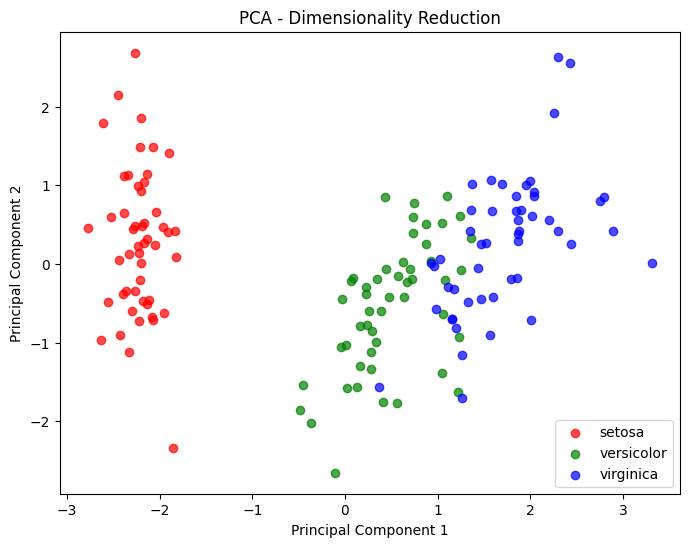

Explained Variance by each component: [0.72962445 0.22850762]
Total Explained Variance: 0.9581320720000165


In [1]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

# Step 2: Load Dataset
data = load_iris()
X = data.data  # Features
y = data.target  # Target labels

# Step 3: Standardize the data (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Apply PCA
# Reduce dimensions to 2 components for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 5: Visualize the reduced data
plt.figure(figsize=(8, 6))
for target, color, label in zip(np.unique(y), ['r', 'g', 'b'], data.target_names):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], 
                label=label, color=color, alpha=0.7)
plt.title("PCA - Dimensionality Reduction")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

# Step 6: Explained Variance
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance by each component: {explained_variance}")
print(f"Total Explained Variance: {sum(explained_variance)}")
